### A Start at some correspondence analysis like I did for Corpus Linguistics

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go # for fancy interactive plot
import plotly.express as px
import seaborn as sns
import requests
import re
from bs4 import BeautifulSoup
import os # to check if directory exists and create it if it doesn't
from datetime import datetime # to parse speech date
from nrclex import NRCLex
import spacy
import en_core_web_md
import csv
import prince # for correspondence analysis
import nltk
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction import text

2023-05-04 15:00:42.289967: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-04 15:00:42.446919: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-05-04 15:00:42.931281: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-05-04 15:00:42.931383: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

### [Skip to load previously saved contingency table](#loadctab)

In [3]:
tidy = pd.read_csv('./Data/genData/tidy_data_oba.csv')
tidy['date'] = pd.to_datetime(tidy['date'], format='%Y-%m-%d')

<A HREF="https://regexr.com/">RegExr</A>

### <A HREF="https://www.nltk.org/index.html">NLTK Documentation</A> <A HREF="https://www.tomaarsen.com/nltk/api/nltk.html">API reference</A>

<a id='loadctab'>Load Contingency Table</a>

In [4]:
################################ LOAD CONTINGENCY TABLE ###############################
# Read in saved contingency table
ctab_oba = pd.read_csv('./Data/genData/contingency_table_amrhet.csv',index_col=0)
# Shorten row index names to date only
ctab_oba = ctab_oba.rename(index = lambda x: x[0:10])

In [5]:
# Let's look at the 150 most common words
ctabshort_oba=ctab_oba.iloc[:, : 150].copy(deep=True)

In [6]:
ctab_oba = None

<A HREF="https://github.com/MaxHalford/prince#correspondence-analysis-ca">Prince Correspondence Analysis</A>

In [7]:
cao = prince.CA(n_components=2,
               n_iter=10,
               copy=True,
               check_input=True,
               engine='sklearn',
               random_state=33)

In [8]:
ctabshort_oba.columns.rename('words', inplace=True)
ctabshort_oba.index.rename('speeches', inplace=True)
ca_oba = cao.fit(ctabshort_oba)

In [9]:
ca_oba.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.161,10.58%,10.58%
1,0.106,7.01%,17.59%


<A HREF="https://maxhalford.github.io/prince/ca/">Prince correspondence analysis</A>

In [10]:
cao.plot(
    ctabshort_oba,
    x_component=0,
    y_component=1
)

alt.Chart(...)

<A HREF="https://matplotlib.org/cheatsheets/cheatsheets.pdf">Matplotlib basic cheat sheet</A><BR>
    <A HREF="https://matplotlib.org/cheatsheets/">other matplotlib cheat sheets</A>

Selma 50th - 2015-03-07

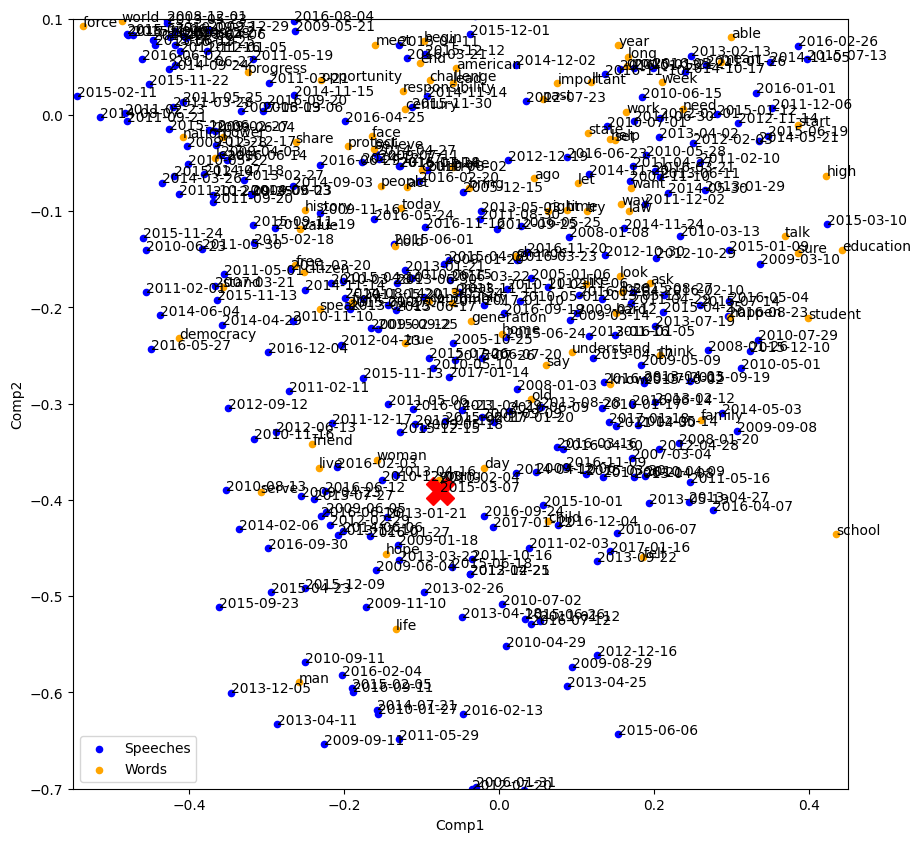

In [11]:
date1 = '2015-03-07'

df1=cao.row_coordinates(ctabshort_oba)
df1.columns=['Comp1', 'Comp2']
df2=cao.column_coordinates(ctabshort_oba)
df2.columns=['Comp1', 'Comp2']

# df1 for speeches
ax = df1.plot(x='Comp1', y='Comp2', figsize=(10, 10), kind='scatter', color='blue')
for i, txt in enumerate(df1.index.values.tolist()):
    ax.annotate(txt, (df1['Comp1'][i], df1['Comp2'][i]))

# df2 for words
df2.plot(ax=ax, x='Comp1', y='Comp2', kind='scatter', color='orange')
for i, txt in enumerate(df2.index.values.tolist()):
    ax.annotate(txt, (df2['Comp1'][i], df2['Comp2'][i]))

ax.plot(df1.loc[[date1]]['Comp1'], df1.loc[[date1]]['Comp2'], marker='X', color='red', markersize=20)

plt.xlim([-0.55, 0.45])
plt.ylim([-0.7, 0.1])
plt.legend(['Speeches', 'Words'])
plt.show()

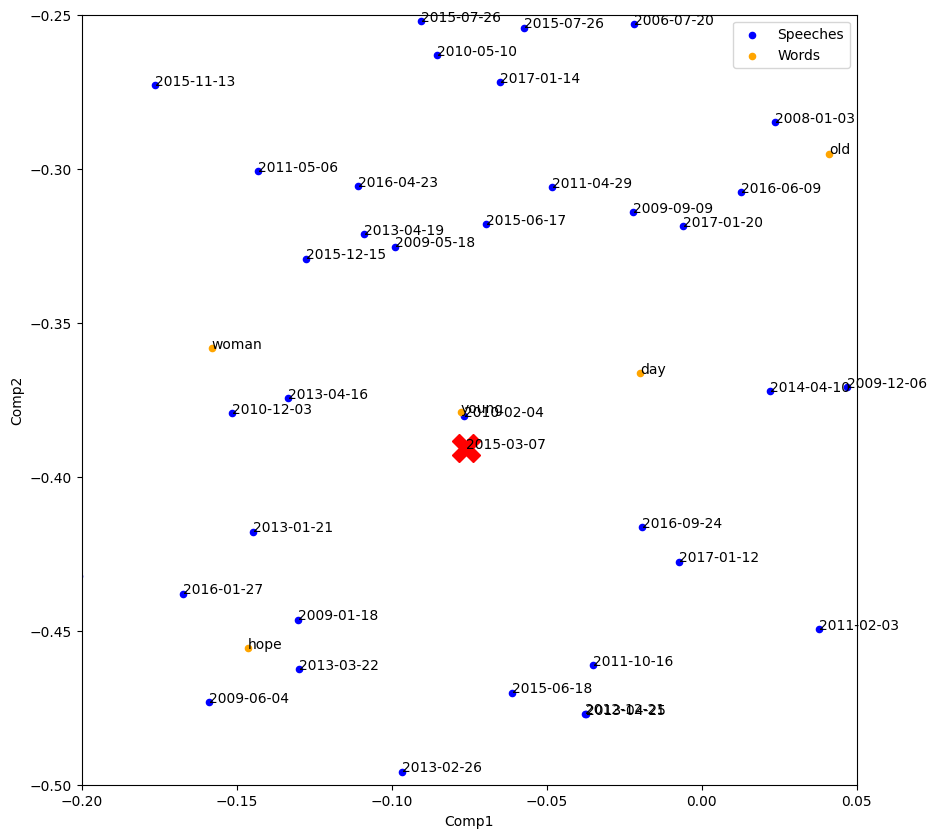

In [12]:
date1 = '2015-03-07'

df1=cao.row_coordinates(ctabshort_oba)
df1.columns=['Comp1', 'Comp2']
df2=cao.column_coordinates(ctabshort_oba)
df2.columns=['Comp1', 'Comp2']

# df1 for speeches
ax = df1.plot(x='Comp1', y='Comp2', figsize=(10, 10), kind='scatter', color='blue')
for i, txt in enumerate(df1.index.values.tolist()):
    ax.annotate(txt, (df1['Comp1'][i], df1['Comp2'][i]))

# df2 for words
df2.plot(ax=ax, x='Comp1', y='Comp2', kind='scatter', color='orange')
for i, txt in enumerate(df2.index.values.tolist()):
    ax.annotate(txt, (df2['Comp1'][i], df2['Comp2'][i]))

ax.plot(df1.loc[[date1]]['Comp1'], df1.loc[[date1]]['Comp2'], marker='X', color='red', markersize=20)

plt.xlim([-0.2, 0.05])
plt.ylim([-0.5, -0.25])
plt.legend(['Speeches', 'Words'])
plt.show()

In [88]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df2.Comp1, y=df2.Comp2,
    name='words',
    marker=dict(color='#00CC96'),
    marker_size=12,
    text=df2.index,
    textposition=['top center'],
    showlegend=True,
    legendgroup=True
))

fig.add_trace(go.Scatter(
    x=df1.Comp1, y=df1.Comp2,
    name='other',
    mode='markers',
    marker=dict(color='rgba(99, 110, 250, 0.5)'),
    text = df1.index,
    marker_size=8,
    showlegend=True,
    legendgroup=True
))

selma = df1.query('speeches == "2015-03-07"')

fig.add_trace(go.Scatter(
    x=selma.Comp1, y=selma.Comp2,
    name='Selma',
    mode='markers',
    marker=dict(color='#EF553B', symbol='star'),
    #text = speeches_oba.source,
    marker_size=12,
    showlegend=True,
    legendgroup=True
))

fig.update_layout(xaxis_range=[-0.12, -0.02])
fig.update_layout(yaxis_range=[-0.5, -0.3])
fig.update_traces(mode='markers+text', marker_line_width=1)
fig.update_layout(title='Correspondence Analysis: Selma 50th Anniversary',
                  yaxis_zeroline=True, xaxis_zeroline=True)
fig.update_traces(textposition="top center")
fig.update_layout(height=600)
fig.update_layout(width=800)
fig.update_layout(showlegend=True)
fig.update_yaxes(
    scaleanchor = "x",
    scaleratio = 1,
  )

fig.update_xaxes(title_text = 'PC 0 ('+cao.eigenvalues_summary.iloc[0,1] +')')
fig.update_yaxes(title_text = 'PC 1 ('+cao.eigenvalues_summary.iloc[1,1] +')')
fig.show()

In [87]:
fig.write_image("./plots/selma_correspondence_analysis.png", format='png', engine='kaleido')

In [ ]:
date1 = '2015-03-07'

df1=cao.row_coordinates(ctabshort_oba)
df1.columns=['Comp1', 'Comp2']
df2=cao.column_coordinates(ctabshort_oba)
df2.columns=['Comp1', 'Comp2']

# df1 for speeches
ax = df1.plot(x='Comp1', y='Comp2', figsize=(10, 10), kind='scatter', color='blue')
for i, txt in enumerate(df1.index.values.tolist()):
    ax.annotate(txt, (df1['Comp1'][i], df1['Comp2'][i]))

# df2 for words
df2.plot(ax=ax, x='Comp1', y='Comp2', kind='scatter', color='orange')
for i, txt in enumerate(df2.index.values.tolist()):
    ax.annotate(txt, (df2['Comp1'][i], df2['Comp2'][i]))

ax.plot(df1.loc[[date1]]['Comp1'], df1.loc[[date1]]['Comp2'], marker='X', color='red', markersize=20)
#ax.plot(df2.loc[['we']]['Comp1'], df2.loc[['we']]['Comp2'], marker='+', color='green', markersize=20)

plt.xlim([-0.4, 0.25])
plt.ylim([-0.7, -0.05])
plt.legend(['Speeches', 'Words'])
plt.show()

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df1.Comp1, y=df1.Comp2,
    name='words',
    marker_color='rgba(200, 60, 60, .7)'
))

fig.add_trace(go.Scatter(
    x=df2.Comp1, y=df2.Comp2,
    name='speeches',
    marker_color='rgba(60, 200, 60, .7)'
))
df3 = df1.query('index == "2015-03-07"').copy()
fig.add_trace(go.Scatter(
    x=df3.Comp1, y=df3.Comp2,
    name='SELMA',
    marker_color='rgba(80, 80, 255, .9)'
))

fig.update_traces(mode='markers', marker_line_width=2)
fig.update_layout(title='Speeches - Words CA',
                  yaxis_zeroline=True, xaxis_zeroline=True)
fig.update_traces(textposition="bottom right")
fig.update_layout(height=800)
fig.show()

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df1.Comp1, y=df1.Comp2,
    name='words',
    marker_color='rgba(200, 60, 60, .7)',
    marker_size=8,
    text=words.word,
    hovertext=words.word,
    showlegend=True,
    ids=words.word
))

fig.add_trace(go.Scatter(
    x=df2.Comp1, y=df2.Comp2,
    name='speeches',
    mode='markers',
    marker=dict(color=speeches.colors),
    marker_size=12,
    text=speeches.date,
    hovertext=speeches.date,
    showlegend=True,
    legendgroup=True
))

fig.update_traces(mode='markers', marker_line_width=2)
fig.update_layout(title='Speeches - Words CA',
                  yaxis_zeroline=True, xaxis_zeroline=True)
fig.update_traces(textposition="bottom right")
fig.update_layout(height=800)
fig.show()

In [ ]:
df1=None
df1=speeches
#df1.columns=['Comp1', 'Comp2', 'date', 'source', 'colors','colorsmpl']
df1.columns=['Comp1', 'Comp2', 'date', 'source', 'colors']
df1.index=df1.source
df1['colorsmpl'] = df1.colors*0.25
df2=words
df2.columns=['Comp1', 'Comp2', 'word']

# df1 for speeches
ax = df1.plot(x='Comp1', y='Comp2', c='colorsmpl', s=80,
              figsize=(10, 10), kind='scatter', cmap='tab20b')

for i, txt in enumerate(df1.index.values.tolist()):
    ax.annotate(txt, (df1['Comp1'][i], df1['Comp2'][i]))

# df2 for words
df2.plot(ax=ax, x='Comp1', y='Comp2', kind='scatter', color='Orange', s=80)

for i, txt in enumerate(df2.index.values.tolist()):
    ax.annotate(txt, (df2['Comp1'][i], df2['Comp2'][i]))

plt.show()